 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [9]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [6]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [7]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [60]:
W0_resul_arr = []
W1_resul_arr = []
W2_resul_arr = []
W3_resul_arr = []
lambda_arr = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
for lambda_val in lambda_arr:
    W_result = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_val)
    W0_resul_arr.append(W_result[0])
    W1_resul_arr.append(W_result[1])
    W2_resul_arr.append(W_result[2])
    W3_resul_arr.append(W_result[3])    

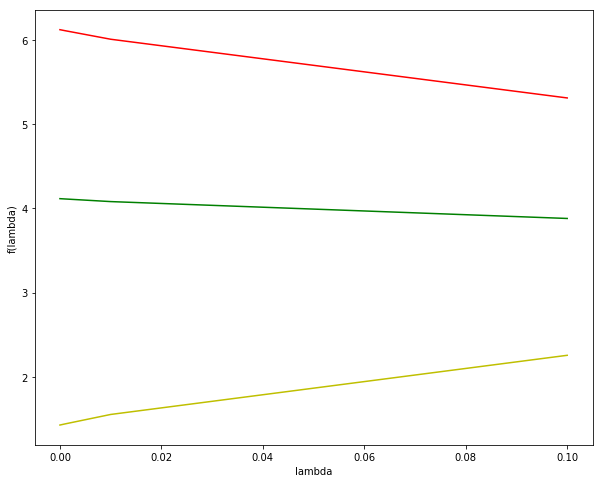

In [80]:
plt.figure(figsize=(10, 8))
plt.xlabel('lambda')
plt.ylabel('f(lambda)')
# plt.plot(dots, f(dots), color='g')
# plt.scatter(lambda_arr, W0_resul_arr)
# plt.plot(lambda_arr, W0_resul_arr, color='r')
plt.plot(lambda_arr, W1_resul_arr, color='r')
plt.plot(lambda_arr, W2_resul_arr, color='y')
plt.plot(lambda_arr, W3_resul_arr, color='g')

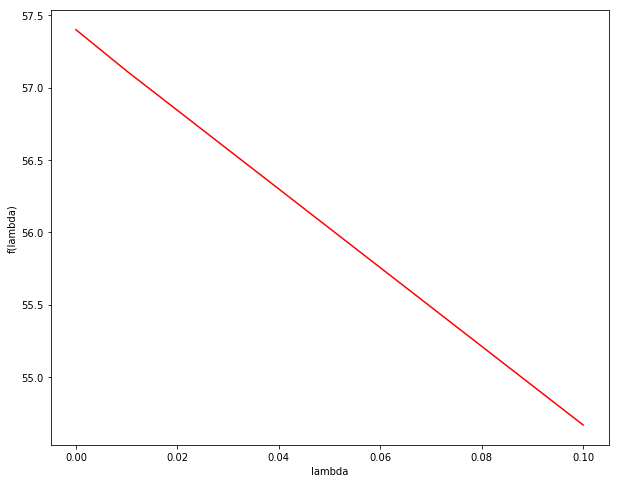

In [79]:
plt.figure(figsize=(10, 8))
plt.xlabel('lambda')
plt.ylabel('f(lambda)')
plt.plot(lambda_arr, W0_resul_arr, color='r')

 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

К одному и тому же признаку применять нормализацию и стандартизацию нельзя.
Ведь нормализация позволяет нам привести все признаки в модели к сопоставимому виду.(мы сможем сравнивать признаки между собой) 
А стандартизация показывает насколько значение признака отклоняется от стандартного распределения.

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W